### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2026-01-14 20:38:25.612 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1471：股票名稱 ＝ 首利，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1711：股票名稱 ＝ 永光，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1712：股票名稱 ＝ 興農，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1721：股票名稱 ＝ 三晃，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1722：股票名稱 ＝ 台肥，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1723：股票名稱 ＝ 中碳，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1731：股票名稱 ＝ 美吾華，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1732：股票名稱 ＝ 毛寶，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1786：股票名稱 ＝ 科妍，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 2302：股票名稱 ＝ 麗正，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2308：股票名稱 ＝ 台達電，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2323：股票名稱 ＝ 中環

2026-01-14 20:38:26.280 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-14 20:38:29.884 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-05
【略過】週Ｋ：2026-01-05


2026-01-14 20:38:38.445 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-06


2026-01-14 20:38:43.973 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-07


2026-01-14 20:38:49.656 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-08


2026-01-14 20:38:55.178 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-09


2026-01-14 20:39:00.614 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-14 20:39:04.211 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-14 20:39:11.011 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-12


2026-01-14 20:39:16.998 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-13


2026-01-14 20:39:22.563 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-01-14


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


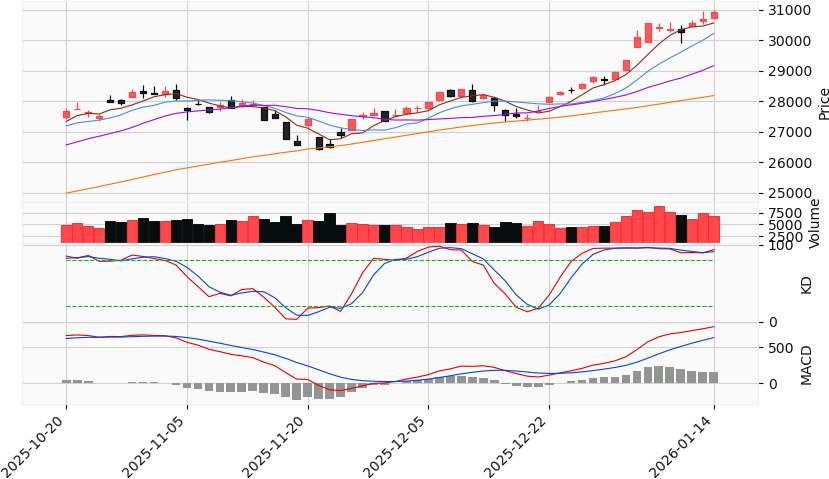

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-08 , 2026-01-09 , 2026-01-13 十字線 : 2026-01-08 吞噬 : 2026-01-09"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 6819.83億元 ，十日均量 ＝ 7185.19億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-26結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-14黃金交叉。並且2026-01-14於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。並且2026-01-05該週在超買區。
整體評價,"價格趨勢 目前為上漲趨勢，近期連續收高並推升至約 31,000 點附近，短期均線上彎且位於中期均線之上，趨勢結構偏多。近幾日高點與收盤同步墊高，顯示多方仍掌控節奏。 價量關係 上漲段成交量維持在相對高檔但未持續放大，屬於價漲量平/量略縮型態。量能未明顯失控，偏向健康推升，但也代表追價動能較前段趨緩。 支撐與壓力 壓力先看 31,000 點整數關卡與近期高點區 31,000～31,100 點。支撐先看 30,700 點附近（近一日收盤區），再看 30,230 點附近（10日線）與 29,170 點附近（20日線）作為回檔防守帶。 KD 指標解讀 K、D 皆位於 80 以上超買區，且K值再度走高，短線偏強但也提高震盪與回檔機率。若後續出現K值下彎並跌破D值，將是短線降溫訊號。 MACD 指標解讀 DIF 與 MACD 線維持多方排列（DIF在上）且同步上行，趨勢動能仍偏多。惟灰色柱狀體（OSC）連續縮小，代表上漲動能邊際轉弱，短線可能轉為高檔整理後再選方向。 綜合評價 整體仍屬多頭趨勢延伸，但在 31,000 點附近遇到整數壓力且動能略降，短線較可能以高檔震盪、回檔換手方式消化。操作上可優先觀察 30,700 點與 30,230 點支撐是否守穩，守穩則偏多續看，跌破則提防回檔加深。"


In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


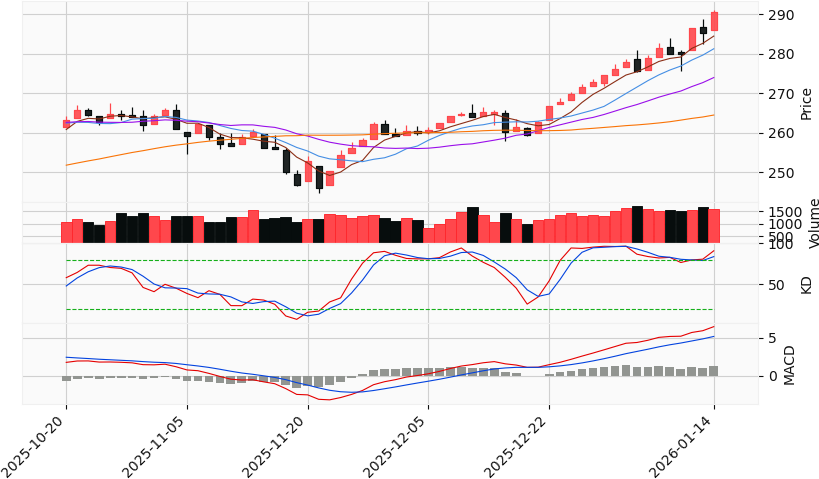

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-13
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1588.46億元 ，十日均量 ＝ 1574.71億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-12黃金交叉。並且2026-01-14於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。並且2026-01-05該週在超買區。
整體評價,價格趨勢 目前為上漲趨勢，近期高點與低點同步墊高，收盤推升至約 290.6 點並創波段新高。短中期均線呈多頭排列且上彎，顯示趨勢延續性仍偏強。 價量關係 上漲過程中成交量維持在相對高檔區間，屬於價漲量能跟上的型態，對多方延續有利。惟近兩日量能未明顯放大，屬於高檔推進但動能需持續補量確認。 支撐與壓力 支撐先看 286.2～285.4 點（近兩日回落區與短線整理帶），跌破則轉看 284.5 點（5日線附近）與 281.3 點（10日線附近）。壓力落在 291.1 點（近期高點）一帶，若有效突破，短線將轉為「壓力尚未形成」的續攻格局。 KD 指標解讀 KD 目前位於超買區（>80），且K值明顯上行並高於D值，短線偏多動能強。由於處於高檔區，後續若出現K值下彎或跌破D值，較容易引發高檔回檔。 MACD 指標解讀 DIF 線位於 MACD 線之上且雙線同步上行，顯示趨勢仍偏多。OSC 柱狀體維持正值並有擴大跡象，代表上漲動能正在增溫。 綜合評價 整體屬於多頭趨勢延續，均線結構、KD與MACD動能皆偏多，短線仍有挑戰 291.1 點上方的條件。惟KD處超買區，操作上宜留意 286.2～285.4 點支撐帶是否守穩，若失守則短線回檔風險上升。


In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [7]:
results = analysis.screener()

In [8]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 4919 ， 股票名稱 ＝ 新唐 
股票代碼 ＝ 8182 ， 股票名稱 ＝ 加高 
股票代碼 ＝ 8213 ， 股票名稱 ＝ 志超 
股票代碼 ＝ 6546 ， 股票名稱 ＝ 正基 
股票代碼 ＝ 6901 ， 股票名稱 ＝ 鑽石投資 
股票代碼 ＝ 2031 ， 股票名稱 ＝ 新光鋼 
股票代碼 ＝ 2444 ， 股票名稱 ＝ 兆勁 
股票代碼 ＝ 1217 ， 股票名稱 ＝ 愛之味 
股票代碼 ＝ 4721 ， 股票名稱 ＝ 美琪瑪 
股票代碼 ＝ 4142 ， 股票名稱 ＝ 國光生 
股票代碼 ＝ 2484 ， 股票名稱 ＝ 希華 
股票代碼 ＝ 2613 ， 股票名稱 ＝ 中櫃 
股票代碼 ＝ 3088 ， 股票名稱 ＝ 艾訊 
股票代碼 ＝ 3209 ， 股票名稱 ＝ 全科 
股票代碼 ＝ 3027 ， 股票名稱 ＝ 盛達 
股票代碼 ＝ 3047 ， 股票名稱 ＝ 訊舟 


* 篩選結果   
  - 全友(2305)：穩健續漲  
    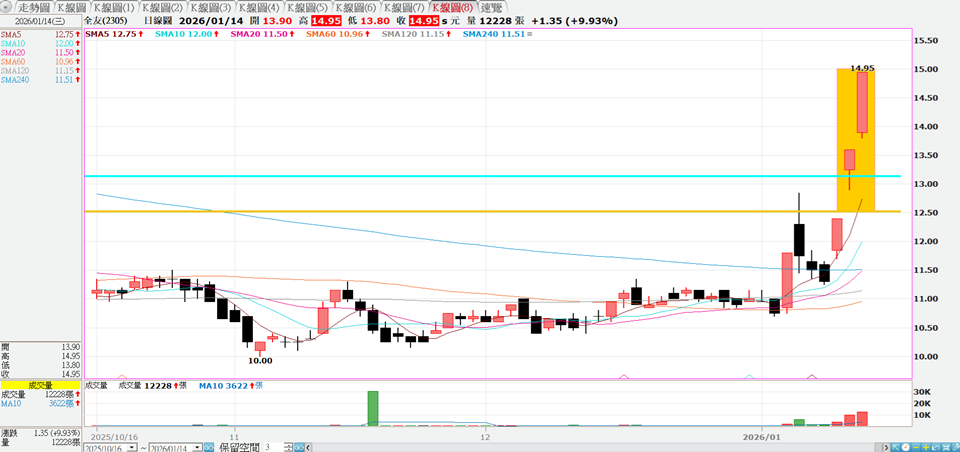  
  - 益得(6461)：技術突破  
    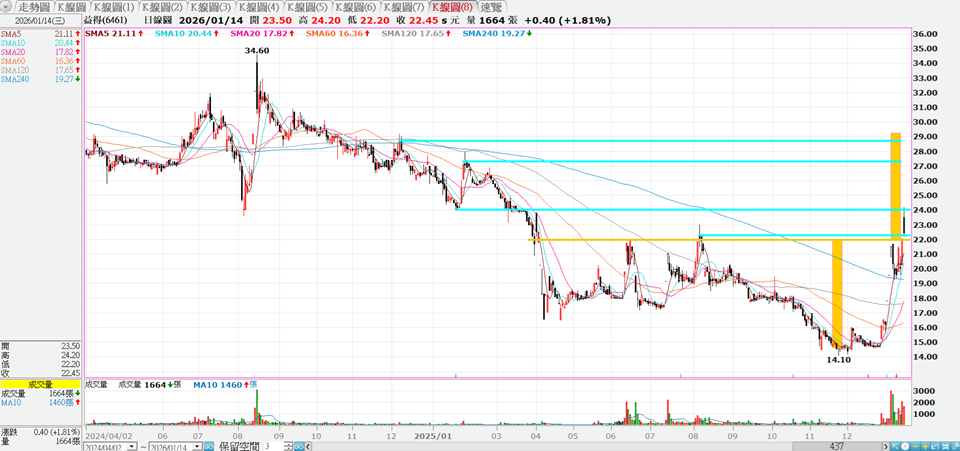   
  - 台泥(1101)：盤整觀察  
    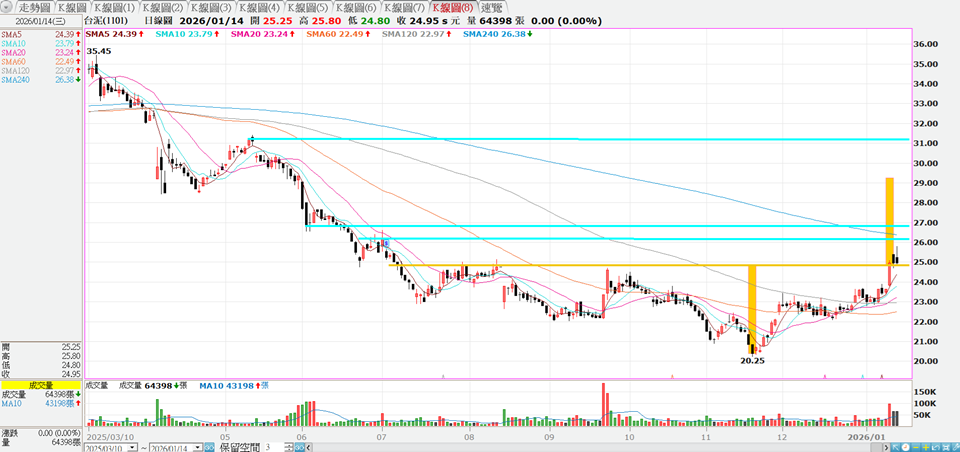   
  - 仲琦(2419)：穩健續漲  
    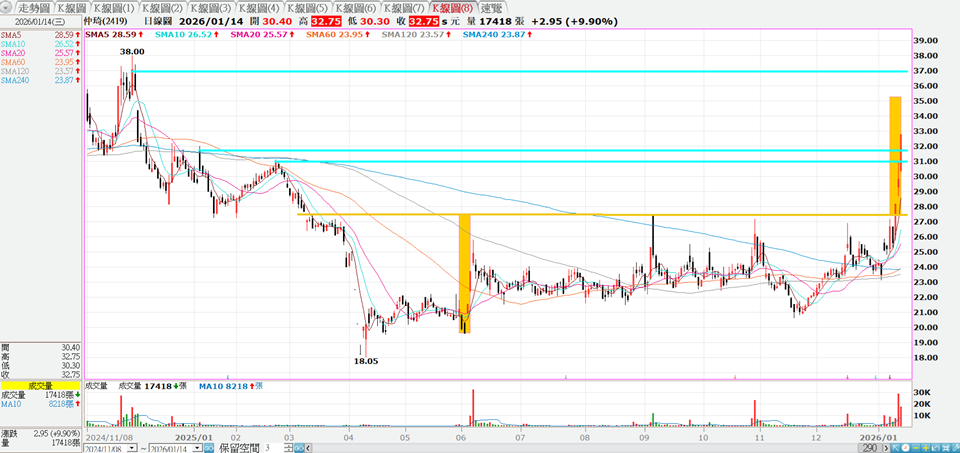   
  - 東捷(8064)：已到目標價  
    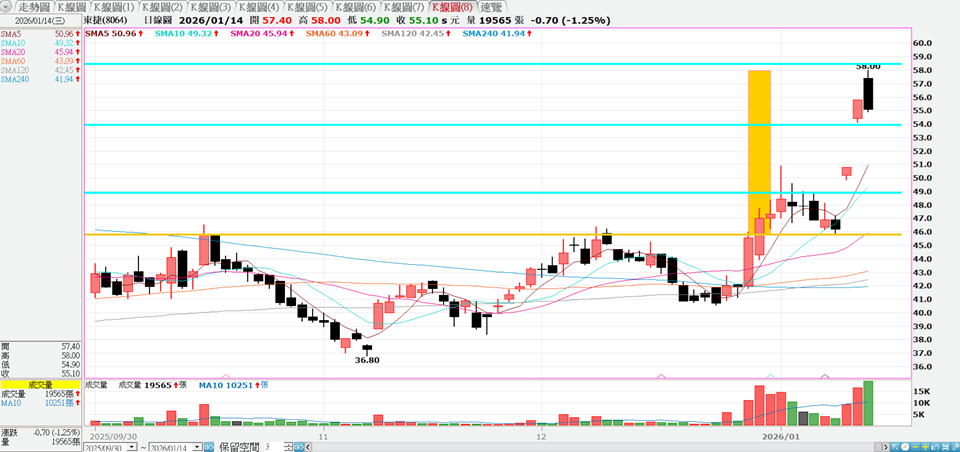   
  - 長華*(8070)：盤整觀察  
    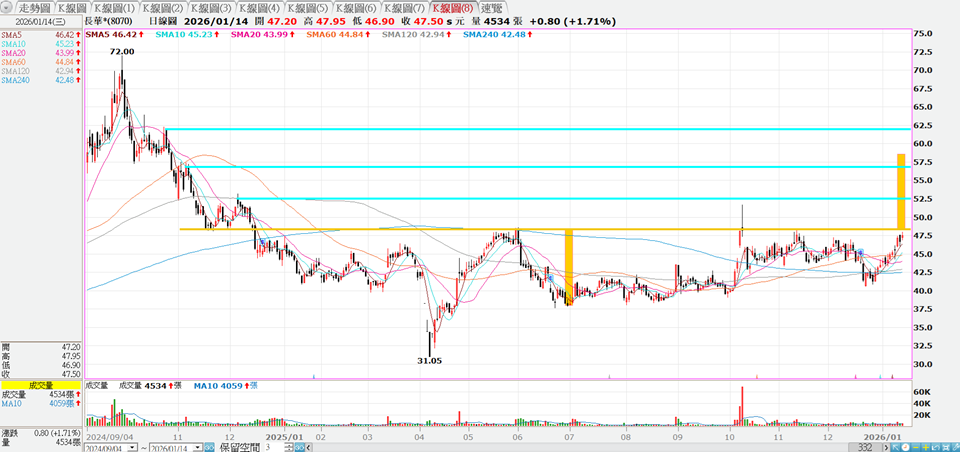   

* 觀察股列表  
  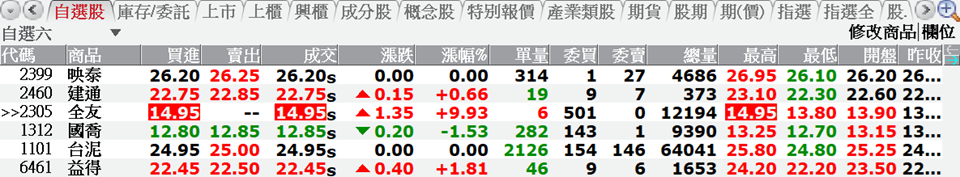  

### 個股解盤  

* 國喬(1312)  
  看法：回測頸線支撐有守。    

> **盤後**：量化技術分析  

解盤內容：


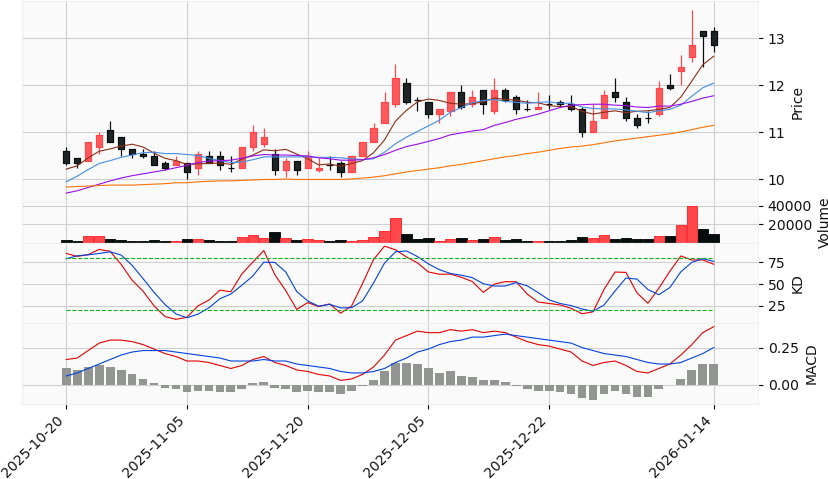

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-09
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 9432張 ，十日均量 ＝ 11527張）
型態,盤整型態之矩形，型態範圍由2025-10-23開始到2025-11-25結束。 底型反轉之底部型態，型態範圍由2025-08-01開始到2025-10-09結束，2025-10-09時已達估算之目標價（10.19元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-07黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-05當週黃金交叉。
整體評價,價格趨勢 整體為上漲趨勢，近期股價自 12 元附近推升至 13 元附近後出現高檔震盪。短期均線（5 日、10 日）上彎且位於中期均線（20 日、60 日）之上，趨勢結構仍偏多。 價量關係 上攻 13 元區間時出現明顯放量，顯示追價動能曾集中釋放。近兩日量能快速降溫且收盤回到 12.85 元，屬於放量上攻後的量縮整理/回檔型態，短線動能轉為收斂。 支撐與壓力 支撐先看 12.70 元（近日低點區），跌破則看 12.62 元（5 日線附近）與 12.40 元（近期回檔低點）。壓力落在 13.15～13.25 元（近日高點帶），若帶量突破，才有機會延伸上行空間。 KD 指標解讀 K 值與 D 值位於 70～80 的偏高區，屬高檔鈍化後的降溫狀態。K 值下彎且低於 D 值，短線偏向整理與回檔，需留意是否回落至 50 附近再決定下一段方向。 MACD 指標解讀 DIF 位於 MACD 線之上且兩者同步上行，趨勢動能仍偏多。OSC 柱狀體維持正值且未明顯縮短，代表多方動能尚在，但短線更可能以高檔震盪消化漲幅。 綜合評價 目前屬多頭趨勢中的高檔整理：中期結構偏多，但短線因量縮與 KD 降溫，追價風險上升。操作上以 12.70 元/12.40 元作為多方防守觀察，並關注能否帶量突破 13.25 元確認續攻。


In [9]:
stock_analysis(analysis,'1312')

> **盤後**：底部反轉交易策略分析  

In [10]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-10-23'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-09'
    bottom_price = range_prices.loc['2025-04-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-12'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為15.89元


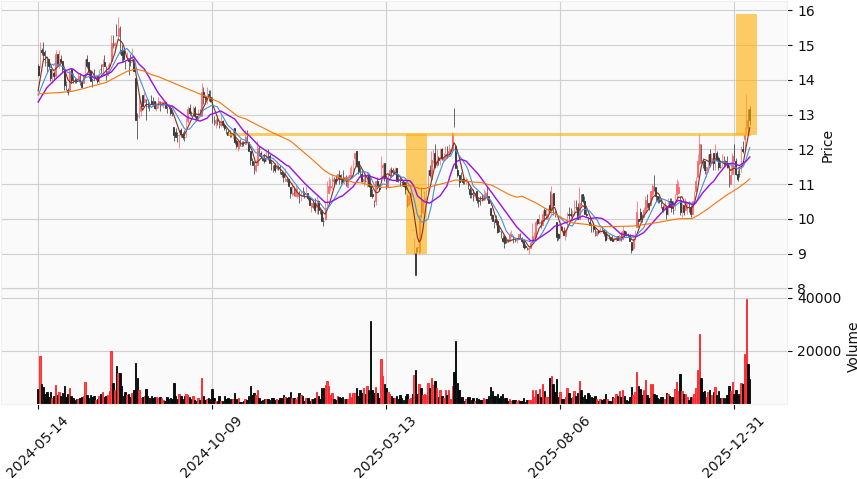

In [11]:
image = mysys.DrawOnKlineChart('1312','2024-05-14','2026-01-14',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-3468)：外資大賣(-3262)、投信中立(0)、自營小賣(-206)。  
主力大賣(-2024)。  
分公司買賣家數差分散(-170)。  
融資○○( )、融券○○( )。  

* 台泥(1101)  
  看法：仍未有效突破底型。  

> **盤後**：量化技術分析  

底型反轉交易策略：


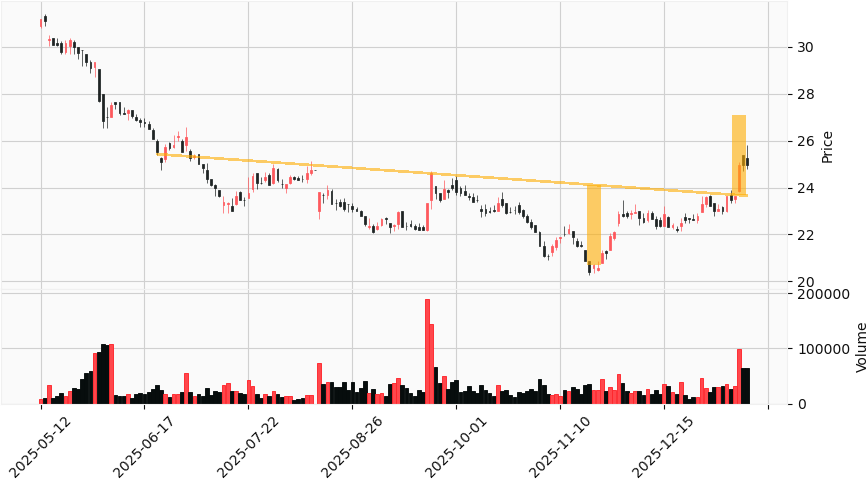

解盤內容：


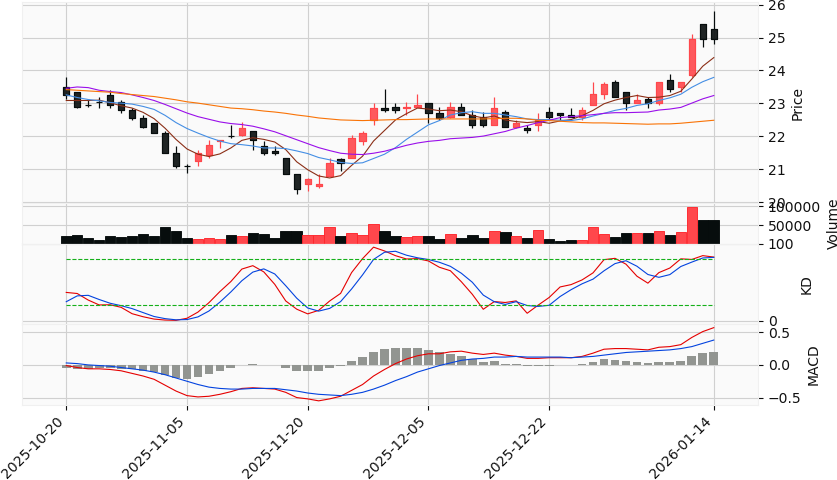

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2026-01-14
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：大型股大量（成交量 ＝ 64398張 ，十日均量 ＝ 43198張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-01-07黃金交叉。並且2026-01-14於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。
整體評價,價格趨勢 目前為上漲格局，近期連續拉升後在 24.95元附近收斂，屬高檔整理但仍守在短中期均線之上。短期均線（5日、10日）上彎且位於中期均線（20日、60日）之上，多頭排列延續。 價量關係 上漲段出現明顯放量（1/12）推升突破，後續兩日量能回落但仍維持相對高檔，屬「放量上攻、縮量整理」的偏多型態。若後續再攻高而量能無法同步放大，需留意短線動能降溫造成的回檔。 支撐與壓力 支撐先看 24.39元（5日線），跌破則看 23.79元（10日線）與 23.24元（20日線）的中期支撐帶。壓力落在 25.40元與 25.80元（近兩日高點區），若帶量突破 25.80元，上方壓力才有機會轉為支撐。 KD指標解讀 K與D皆位於80以上超買區，且目前K略低於D，顯示高檔動能有鈍化跡象。若K持續下彎並跌破80，短線較易出現回檔整理；反之維持高檔鈍化則偏多續強。 MACD指標解讀 DIF位於MACD線之上且雙線同步上行，趨勢仍偏多。OSC柱狀體持續擴大，代表上漲動能仍在增強，但已在高檔區，後續需觀察柱狀體是否轉為縮小以判斷動能降溫。 綜合評價 整體維持多頭趨勢，屬「突破後高檔整理」型態，短線偏強但因KD處於超買，追價風險上升。操作上以 24.39元／23.79元為多方防守觀察點，能否帶量突破 25.80元將決定是否延伸下一段上攻。


In [12]:
stock_analysis(analysis,'1101',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [13]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為29.30元


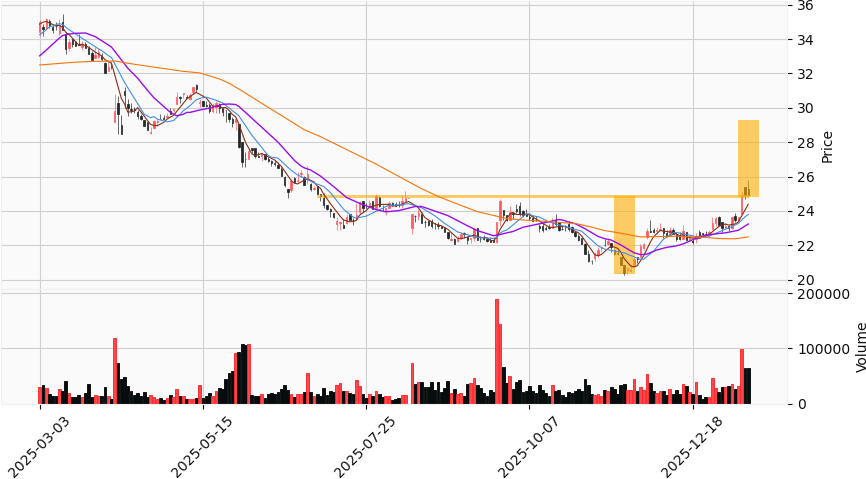

In [14]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-01-14',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-13303)：外資大賣(-13508)、投信中立(-21)、自營小買(+226)。  
主力大賣(-9822)。  
分公司買賣家數差分散(-29)。  
融資○○( )、融券○○( )。  

* 全友(2305)  
  看法：續漲。離滿足區與前波壓力區不遠，剩下空間不多。   

> **盤後**：量化技術分析  

解盤內容：


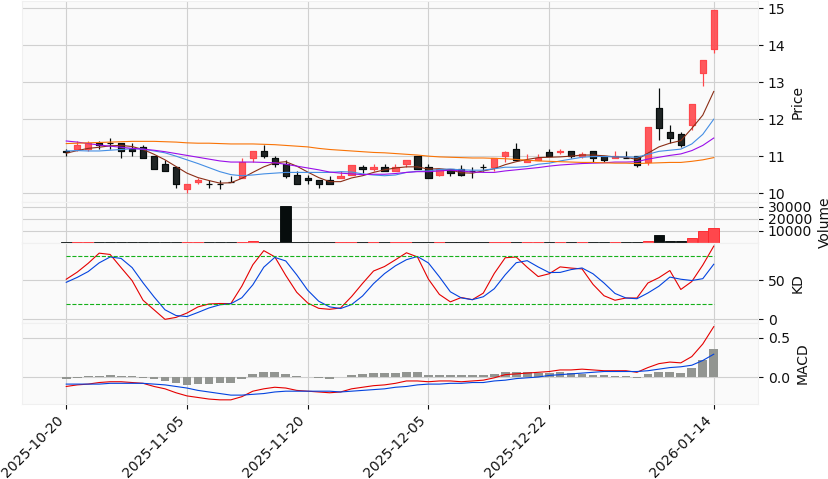

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：中小型股大量／大型股天量（成交量 ＝ 12228張 ，十日均量 ＝ 3622張）
型態,反轉型態之頭肩底，型態範圍由2025-09-26開始到2026-01-02結束，估算目標價為11.72元。 底型反轉之底部型態，型態範圍由2025-06-11開始到2025-08-04結束，2025-08-15時已達估算之目標價（11.45元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-13黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-05當週死亡交叉。
整體評價,"價格趨勢 目前為明顯上漲走勢，近兩日連續長紅推升收盤至 14.95元，短線呈加速拉抬。價格已明顯站上5日、10日、20日與60日均線，且短期均線上彎擴散，偏多結構強。 價量關係 上漲同步放量，近三個交易日量能由 3,625張 → 9,635張 → 12,228張，屬於量增價漲的多方動能延續。惟短線漲幅偏大，後續若出現價漲量縮或爆量長上影，需留意高檔震盪加劇。 支撐與壓力 支撐先看 13.80元（當日低點）與 13.60元（前一日收盤/近期轉折），跌破則回測 12.75元（5日線附近）機率上升。壓力以 14.95元（當日高點/收盤）為近端關卡，若有效突破則上方屬於尚未形成的延伸區。 KD指標解讀 K值約 93、D值約 70，已進入超買區，且K線明顯高於D線，短線動能強但也提高回檔風險。若後續K線自高檔下彎並跌破D線，將是短線降溫訊號。 MACD指標解讀 DIF線位於MACD線之上且雙線同步上行，代表多方趨勢延續。OSC柱狀體持續放大，顯示上漲動能正在增強，但也意味短線過熱後較容易出現震盪。 綜合評價 整體偏多且屬強勢加速段，量能與均線結構支持續攻，但KD超買與漲幅擴大使短線回檔機率上升。操作上可優先觀察 13.80元/13.60元支撐是否守穩，守穩偏多續抱；若跌破則短線轉為高檔整理或回檔的風險提高。"


In [15]:
stock_analysis(analysis,'2305')

> **盤後**：底部反轉交易策略分析  

In [16]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-25']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-13'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為15.00元


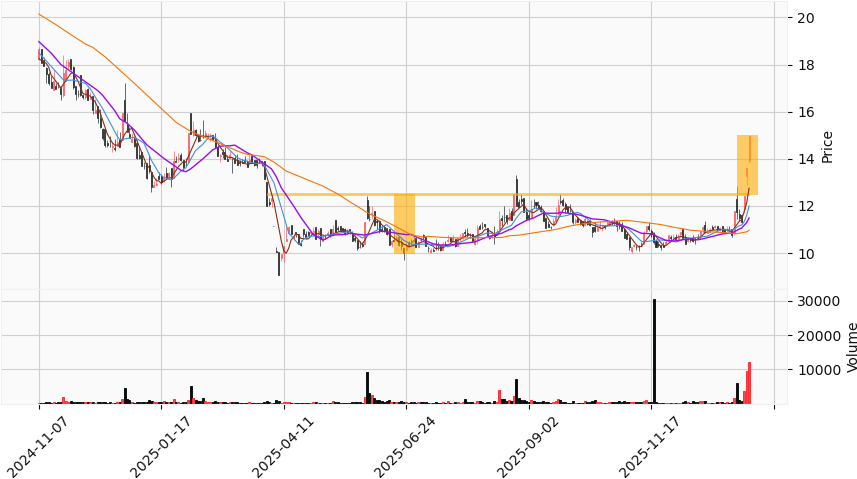

In [17]:
image = mysys.DrawOnKlineChart('2305','2024-11-07','2026-01-14',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-311)：外資大賣(-256)、投信中立(0)、自營大賣(-55)。  
主力大賣(-609)。  
分公司買賣家數差分散(-19)。  
融資○○( )、融券○○( )。  